___

# Support Vector Machines Project 

___

Welcome to my Support Vector Machine Project! We will be analyzing the famous iris data set!

## The Data
For this series, we will be using the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Here's a picture of the three different Iris types:

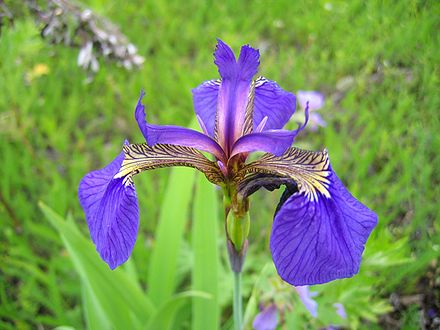

In [1]:
# The Iris Setosa
from IPython.display import Image
path = '/Users/archismanchakraborti/Downloads/Irissetosa1.jpg'
Image(path,width=300, height=300)

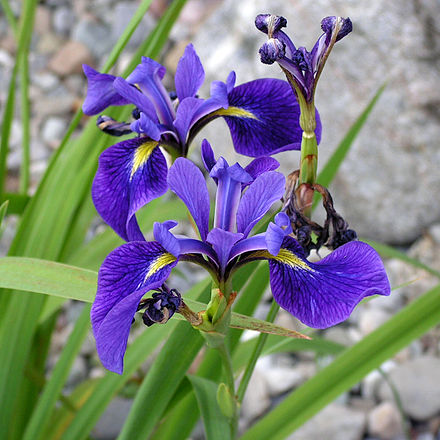

In [2]:
# The Iris Versicolor
from IPython.display import Image
path = '/Users/archismanchakraborti/Downloads/440px-Blue_Flag,_Ottawa.jpg'
Image(path,width=300, height=300)

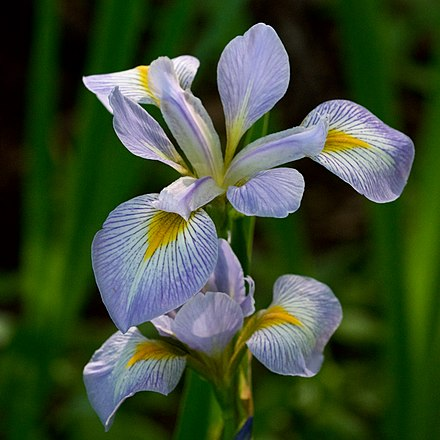

In [3]:
# The Iris Virginica
from IPython.display import Image
path = '/Users/archismanchakraborti/Downloads/440px-Iris_virginica_2.jpg'
Image(path,width=300, height=300)

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Getting the data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = 'darkgrid', context = 'talk')

In [5]:
iris = pd.read_csv('/Users/archismanchakraborti/Desktop/iris.csv')

Let's visualize the data.

## Exploratory Data Analysis

**Which flower species seems to be the most separable?**

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


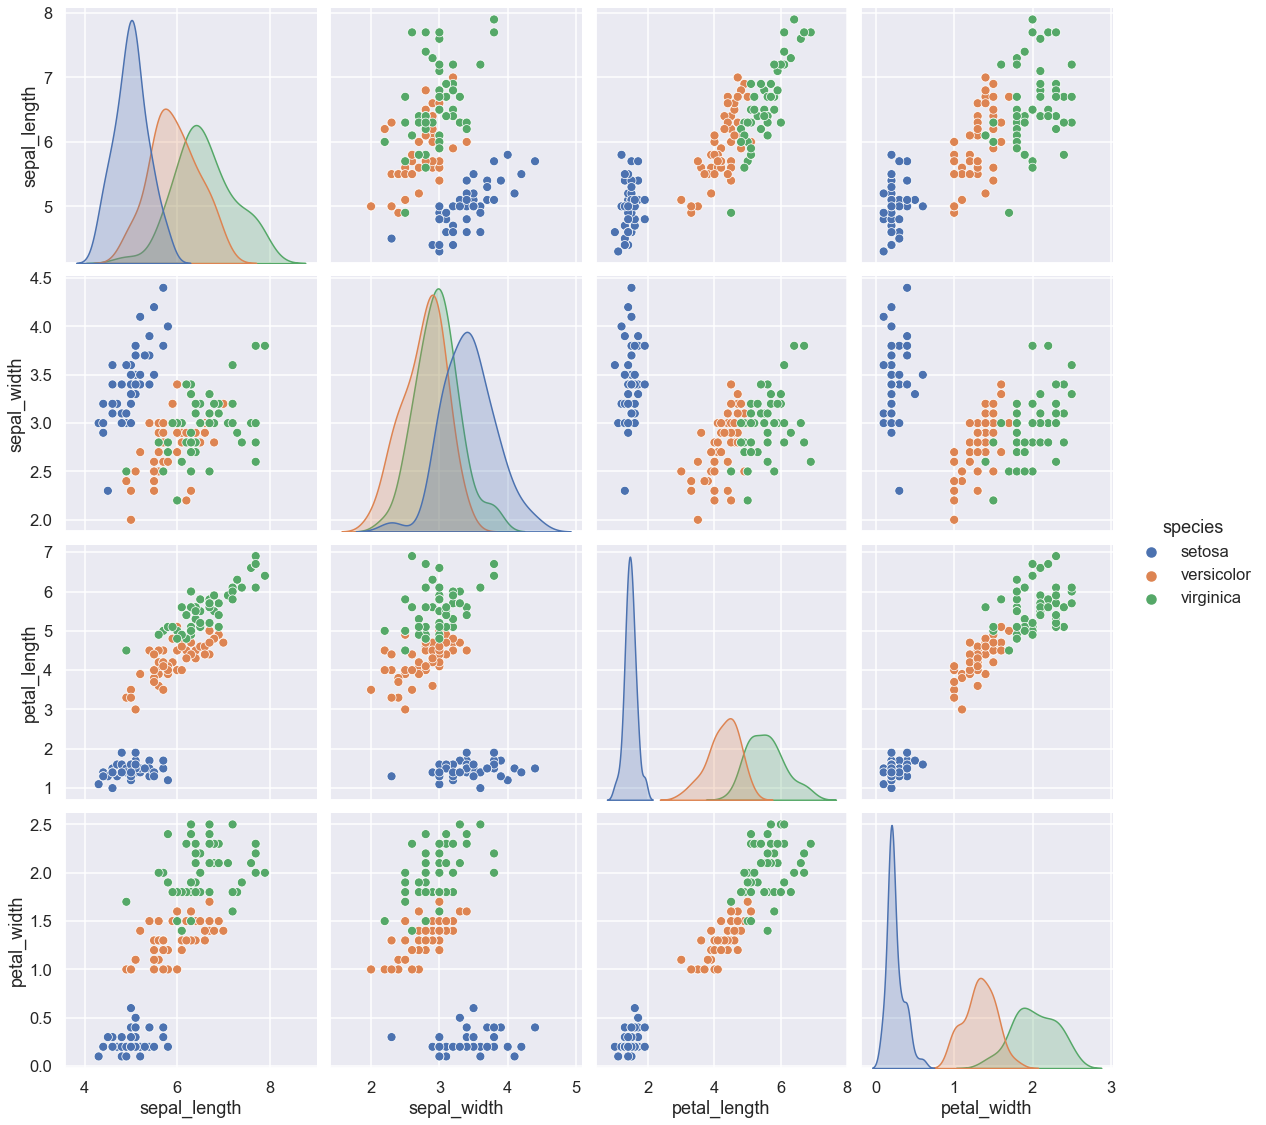

In [7]:
sns.pairplot(data = iris, hue = 'species', height = 4)

#### The setosa variety seems to be the most separable

**We'll a kde plot of sepal_length versus sepal width for setosa species of flower.**

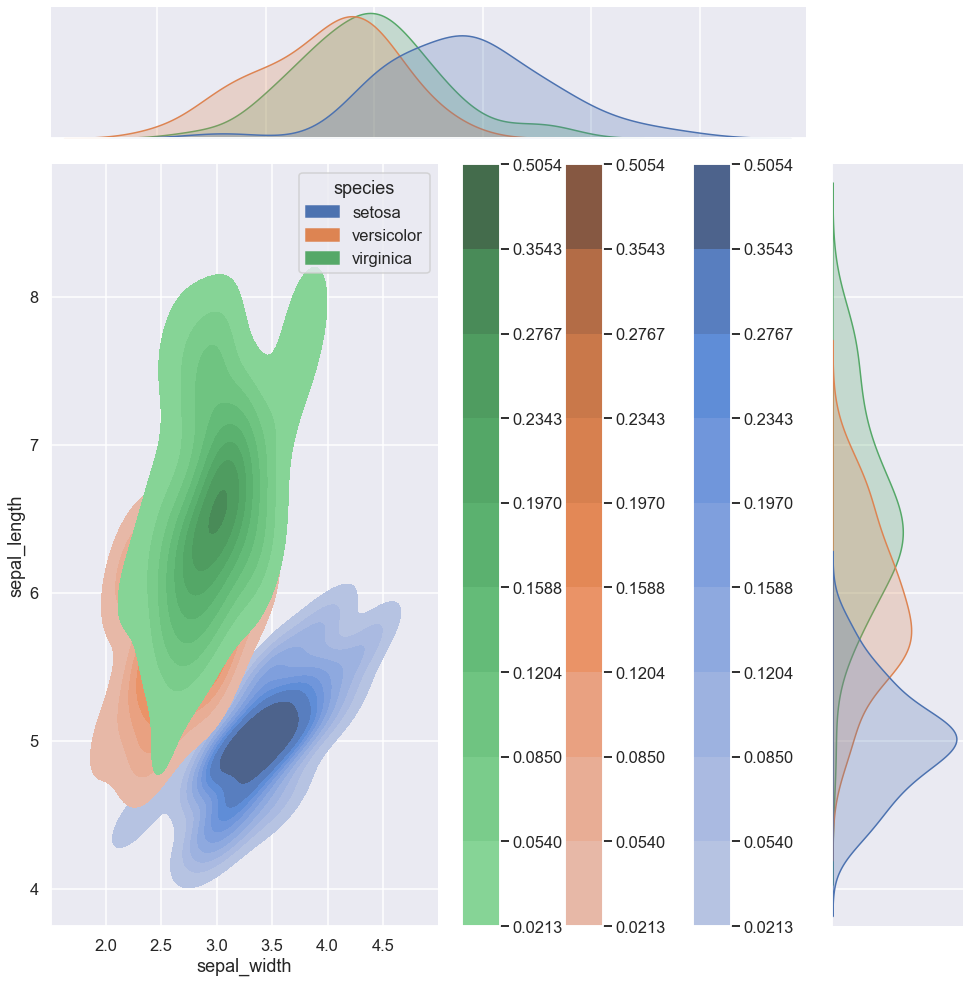

In [8]:
sns.jointplot(kind = 'kde', data = iris, x = 'sepal_width', y = 'sepal_length', fill = True, cbar = True,
              height = 14, hue = 'species')

# Train Test Split


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = iris.drop('species', axis = 1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Train a Model

Now its time to train a Support Vector Machine Classifier. 

**We'll call the SVC() model from sklearn and fit the model to the training data.**

In [11]:
from sklearn.svm import SVC

In [12]:
svm = SVC()

In [13]:
svm.fit(X_train, y_train)

SVC()

## Model Evaluation

**Now we'll get predictions from the model and create a confusion matrix and a classification report.**

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
y_pred = svm.predict(X_test)

In [16]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  0, 12]])

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Our model was pretty good! Let's see if we can tune the parameters to try to get even better (unlikely, and we'll probably would be satisfied with these results in real like because the data set is quite small, but I just want to practice using GridSearch.

## Gridsearch Practice


In [18]:
from sklearn.model_selection import GridSearchCV

**We'll create a dictionary called param_grid and fill out some parameters for C and gamma.**

In [19]:
param_grid = {'C':[1,2,3,4,5,6],
              'kernel':['linear', 'poly', 'rbf'],
              'gamma':[1, 0.1, 0.2, 0.01, 0.02, 0.001, 0.002, 0.0001, 0.0002],
              }

**We'll create a GridSearchCV object and fit it to the training data.**

In [20]:
grid = GridSearchCV(SVC(), param_grid, verbose = 8)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.952 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.905 total time=   0.0s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.857 total time=   0.0s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.905 total time=   0.0s
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.952 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rb

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.2, 0.01, 0.02, 0.001, 0.002,
                                   0.0001, 0.0002],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=8)

**Now let's take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them.**

In [21]:
grid.best_params_

{'C': 2, 'gamma': 0.2, 'kernel': 'rbf'}

In [22]:
grid_preds = grid.predict(X_test)

In [23]:
confusion_matrix(y_test, grid_preds)

array([[13,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 12]])

In [24]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Our model is 100% accurate!!

---
END
---